In [4]:
from google.colab import files

# Upload files manually
uploaded = files.upload()


Saving Train_data.csv to Train_data.csv
Saving Variable Description.csv to Variable Description.csv


In [5]:
# See what files are in Colab right now
!ls


 sample_data   Train_data.csv  'Variable Description.csv'


In [6]:
import pandas as pd

# Load CSV files
train = pd.read_csv("Train_data.csv")
var_desc = pd.read_csv("Variable Description.csv")

# Preview first 5 rows
train.head()


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [7]:
# Check number of rows and columns
train.shape


(7160, 14)

In [8]:
# Check data types and missing values
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [9]:
# Basic statistics for numeric columns
train.describe()


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [10]:
# How many buildings had claims vs no claims
train['Claim'].value_counts()


,count
Claim,
0,5526
1,1634


In [11]:
# See what each column means
var_desc.head(10)


,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [12]:
# Check for missing values
train.isnull().sum()


,0
Customer Id,0
YearOfObservation,0
Insured_Period,0
Residential,0
Building_Painted,0
Building_Fenced,0
Garden,7
Settlement,0
Building Dimension,106
Building_Type,0


In [14]:
# Features (X) and target (y)
X = train.drop('Claim', axis=1)
y = train['Claim']


In [15]:
# Numeric columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')
Categorical columns: Index(['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement', 'NumberOfWindows', 'Geo_Code'],
      dtype='object')


In [19]:
# Fill numeric missing values with median
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Fill categorical missing values with mode
X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])


In [20]:
# One-hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
X_train.shape, X_test.shape


((5728, 8485), (1432, 8485))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize model
log_model = LogisticRegression(max_iter=1000)

# Train model
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:,1]  # probability of Claim=1

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print(classification_report(y_test, y_pred_log))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.776536312849162
Logistic Regression ROC-AUC: 0.6829810324705781
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1098
           1       0.57      0.17      0.26       334

    accuracy                           0.78      1432
   macro avg       0.68      0.57      0.57      1432
weighted avg       0.74      0.78      0.73      1432



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7828212290502793
Random Forest ROC-AUC: 0.6794430265152757
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1098
           1       0.70      0.12      0.20       334

    accuracy                           0.78      1432
   macro avg       0.74      0.55      0.54      1432
weighted avg       0.77      0.78      0.72      1432



In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression metrics
acc_log = accuracy_score(y_test, y_pred_log)
roc_log = roc_auc_score(y_test, y_prob_log)

# Random Forest metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

# Print comparison
print("===== Model Comparison =====")
print(f"Logistic Regression -> Accuracy: {acc_log:.4f}, ROC-AUC: {roc_log:.4f}")
print(f"Random Forest      -> Accuracy: {acc_rf:.4f}, ROC-AUC: {roc_rf:.4f}")

# Optional: detailed classification reports
print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))


===== Model Comparison =====
Logistic Regression -> Accuracy: 0.7765, ROC-AUC: 0.6830
Random Forest      -> Accuracy: 0.7828, ROC-AUC: 0.6794

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1098
           1       0.57      0.17      0.26       334

    accuracy                           0.78      1432
   macro avg       0.68      0.57      0.57      1432
weighted avg       0.74      0.78      0.73      1432


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1098
           1       0.70      0.12      0.20       334

    accuracy                           0.78      1432
   macro avg       0.74      0.55      0.54      1432
weighted avg       0.77      0.78      0.72      1432



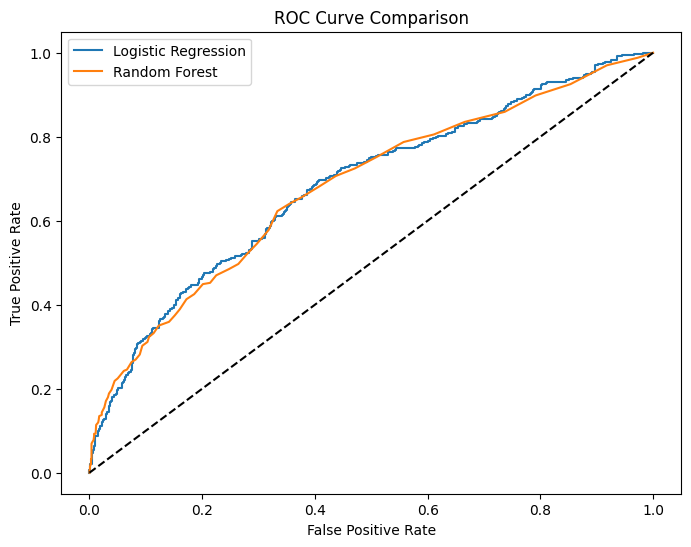

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

# ROC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1], [0,1], 'k--')  # random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [28]:
# Create a results DataFrame
results = X_test.copy()
results['Actual_Claim'] = y_test
results['Predicted_Probability'] = y_prob_rf

# Preview first 5 rows
results.head()


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Customer Id_H12616,Customer Id_H12617,Customer Id_H12619,Customer Id_H12621,...,Geo_Code_95500,Geo_Code_95539,Geo_Code_95555,Geo_Code_95563,Geo_Code_95582,Geo_Code_95585,Geo_Code_95598,Geo_Code_95607,Actual_Claim,Predicted_Probability
1894,2012,1.000000,0,978.0,2,1960.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.03
6774,2013,1.000000,0,516.0,3,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.05
239,2012,0.554645,1,2713.0,4,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.25
4609,2013,1.000000,0,611.0,1,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.02
5694,2013,1.000000,0,1950.0,2,1988.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.03


In [29]:
results.to_csv("Building_Claim_Predictions.csv", index=False)


In [30]:
# Load the saved CSV to confirm
pd.read_csv("Building_Claim_Predictions.csv").head()


,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Customer Id_H12616,Customer Id_H12617,Customer Id_H12619,Customer Id_H12621,...,Geo_Code_95500,Geo_Code_95539,Geo_Code_95555,Geo_Code_95563,Geo_Code_95582,Geo_Code_95585,Geo_Code_95598,Geo_Code_95607,Actual_Claim,Predicted_Probability
0,2012,1.000000,0,978.0,2,1960.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.03
1,2013,1.000000,0,516.0,3,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.05
2,2012,0.554645,1,2713.0,4,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.25
3,2013,1.000000,0,611.0,1,1980.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.02
4,2013,1.000000,0,1950.0,2,1988.0,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0.03


In [31]:
Building_Insurance_Claim_Prediction/
 ├── Data/                 # optional (train.csv, variable_description.csv)
 ├── Building_Insurance_Claim_Prediction.ipynb  # your Colab notebook
 ├── Building_Claim_Predictions.csv            # predicted probabilities


SyntaxError: invalid character '├' (U+251C) (ipython-input-1760241535.py, line 2)